# Information regarding DataSet

Breast Cancer Dataset Description:

    ID number: Unique identification number for each sample.
    Outcome:
        'R': Indicates recurrence of cancer.
        'N': Indicates non-recurrence of cancer.
    Time:
        Recurrence time if Outcome is 'R'.
        Disease-free time if Outcome is 'N'.
    Ten real-valued features computed for each cell nucleus:
      a) Radius: Mean of distances from center to points on the perimeter.
      b) Texture: Standard deviation of gray-scale values.
      c) Perimeter: Perimeter of the cell nucleus.
      d) Area: Area of the cell nucleus.
      e) Smoothness: Local variation in radius lengths.
      f) Compactness: (Perimeter^2 / Area) - 1.0.
      g) Concavity: Severity of concave portions of the contour.
      h) Concave points: Number of concave portions of the contour.
      i) Symmetry: Symmetry of the cell nucleus.
      j) Fractal dimension: "Coastline approximation" - 1.

    Tumor size: Diameter of the excised tumor in centimeters.
    Lymph node status: Number of positive axillary lymph nodes observed at the time of surgery.

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import OneHotEncoder
from IPython.display import display
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")

file_path = 'wpbc.data'
column_names = ['ID' , 'Outcome'] + [f'Feature_{i}' for i in range(1, 34)]

# Cleaning the Data
df = pd.read_csv(file_path, header=None, names=column_names, na_values=['?'])
df.dropna(inplace=True)

display(df)

,ID,Outcome,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,...,Feature_24,Feature_25,Feature_26,Feature_27,Feature_28,Feature_29,Feature_30,Feature_31,Feature_32,Feature_33
0,119513,N,31,18.02,27.60,117.50,1013.0,0.09489,0.10360,0.10860,...,139.70,1436.0,0.11950,0.1926,0.3140,0.11700,0.2677,0.08113,5.0,5.0
1,8423,N,61,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,...,184.60,2019.0,0.16220,0.6656,0.7119,0.26540,0.4601,0.11890,3.0,2.0
2,842517,N,116,21.37,17.44,137.50,1373.0,0.08836,0.11890,0.12550,...,159.10,1949.0,0.11880,0.3449,0.3414,0.20320,0.4334,0.09067,2.5,0.0
3,843483,N,123,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,...,98.87,567.7,0.20980,0.8663,0.6869,0.25750,0.6638,0.17300,2.0,0.0
4,843584,R,27,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,...,152.20,1575.0,0.13740,0.2050,0.4000,0.16250,0.2364,0.07678,3.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,9411300,N,3,14.72,25.26,99.28,657.5,0.11740,0.21120,0.17290,...,111.60,814.8,0.14640,0.5352,0.5655,0.19740,0.3778,0.11320,1.7,21.0
193,942640,N,10,22.52,21.92,146.90,1597.0,0.07592,0.09162,0.06862,...,162.10,1902.0,0.08191,0.1319,0.1056,0.09378,0.2061,0.05788,6.0,2.0
194,943471,N,8,15.44,31.18,101.00,740.4,0.09399,0.10620,0.13750,...,112.60,929.0,0.12720,0.2362,0.2975,0.12860,0.2914,0.08024,1.5,0.0
195,94547,N,12,17.17,29.19,110.00,915.3,0.08952,0.06655,0.06583,...,132.50,1295.0,0.12610,0.1572,0.2141,0.09520,0.3362,0.06033,3.7,0.0


### Label Encoding the Outcome Column

In [4]:
label_encoder = LabelEncoder()
outcome_encoded_t = label_encoder.fit_transform(df['Outcome'])
outcome_encoded = pd.DataFrame(outcome_encoded_t, columns=['Encoded_Outcome'])
print(outcome_encoded.shape)

(194, 1)


In [5]:
# Data preprocessing
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.drop(columns=['Outcome']))  # Exclude non-numeric columns from scaling
print(scaled_data.shape)

# Concatenate the encoded 'ID' column with the scaled data
scaled_data = np.concatenate([scaled_data, outcome_encoded], axis=1)
print(scaled_data.shape)


(194, 34)
(194, 35)


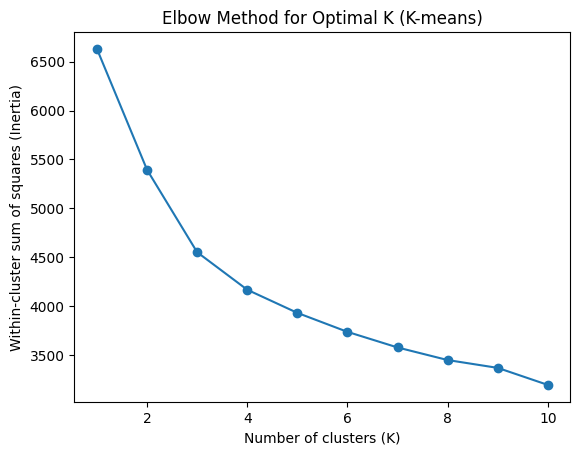

In [6]:
# Applying K-means clustering
kmeans_inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    kmeans_inertia.append(kmeans.inertia_)

# Plotting the elbow curve to find the suitable choice of K for K-means
plt.plot(range(1, 11), kmeans_inertia, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Within-cluster sum of squares (Inertia)')
plt.title('Elbow Method for Optimal K (K-means)')
plt.show()

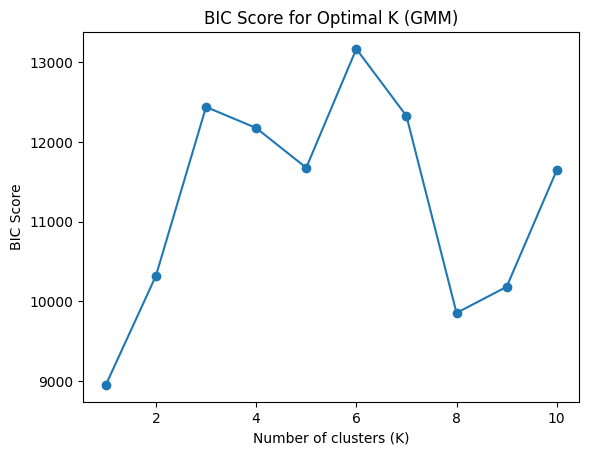

In [7]:
# Applying Gaussian Mixture Model (GMM) clustering
bic_scores = []
for k in range(1, 11):
    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm.fit(scaled_data)
    bic_scores.append(gmm.bic(scaled_data))

# Plotting the BIC scores to find the suitable choice of K for GMM
plt.plot(range(1, 11), bic_scores, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('BIC Score')
plt.title('BIC Score for Optimal K (GMM)')
plt.show()


In [8]:
# K-means clustering with K=4
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_data)


In [9]:
# GMM clustering with K=2
gmm = GaussianMixture(n_components=2, random_state=42)
gmm_labels = gmm.fit_predict(scaled_data)


### Plotting K-means Clusters for Tumor Size vs Outcome

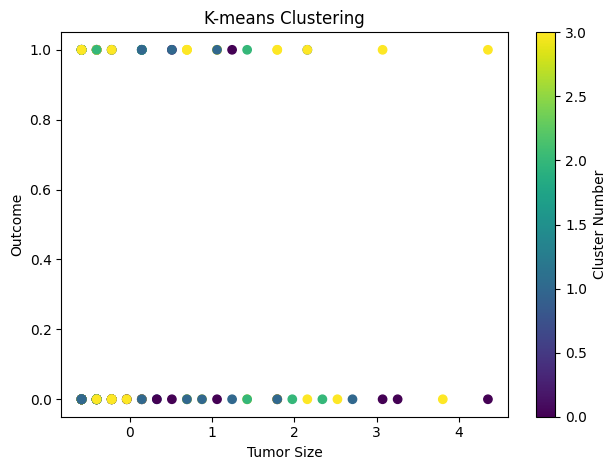

In [10]:
# Plotting K-means clusters
plt.scatter(scaled_data[:, 33], scaled_data[:, 34], c=kmeans_labels, cmap='viridis')
plt.title('K-means Clustering')
plt.xlabel('Tumor Size')
plt.ylabel('Outcome')
plt.tight_layout()
plt.colorbar(label='Cluster Number')
plt.show()


### Plotting GMM Clusters for Tumor Size vs Outcome

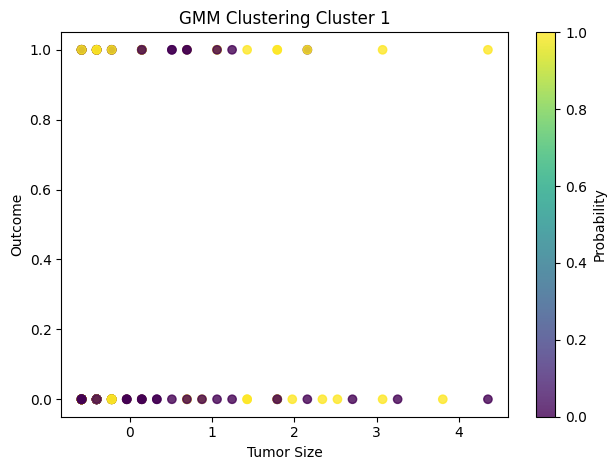

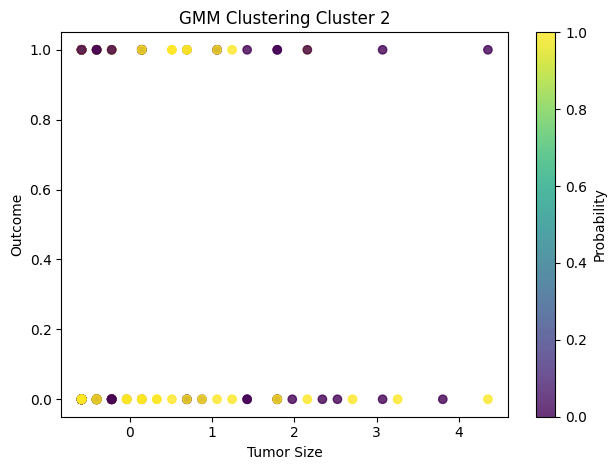

In [50]:
# Plotting GMM clusters
for i in range(len(gmm.means_)):
    probs = gmm.predict_proba(scaled_data)
    plt.scatter(scaled_data[:, 33], scaled_data[:, 34], c=probs[:, i], cmap='viridis', alpha=0.8)
    plt.colorbar(label='Probability')
    plt.title(f'GMM Clustering Cluster {i+1}')
    plt.xlabel('Tumor Size')
    plt.ylabel('Outcome')
    plt.tight_layout()
    plt.show()

In [71]:
from sklearn.decomposition import PCA
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_score

pca = PCA(n_components=2)  # Reduce to 2 dimensions
pca.fit(scaled_data)
df_reduced = pca.transform(scaled_data)
# Convert transformed data to dataframe
df_red = pd.DataFrame(df_reduced, columns=['PC_1', 'PC_2'])
display(df_red)

,PC_1,PC_2
0,-1.642758,-2.261014
1,6.181544,3.105055
2,1.139355,-0.978462
3,2.953492,11.559778
4,1.373015,-1.870933
...,...,...
189,0.037753,3.855792
190,1.055839,-6.858519
191,-3.187219,-0.585999
192,-3.035221,-2.882228


#### Normalising the dataframe

In [52]:
scaler = StandardScaler()
scaled_reduced_data = scaler.fit_transform(df_reduced)
normalized_reduced_data = normalize(scaled_reduced_data)
df_normalized = pd.DataFrame(normalized_reduced_data, columns=['PC_1', 'PC_2'])
display(df_normalized)

,PC_1,PC_2
0,-0.557378,-0.830259
1,0.878567,0.477619
2,0.732478,-0.680791
3,0.229760,0.973247
4,0.561224,-0.827664
...,...,...
189,0.009047,0.999959
190,0.140826,-0.990034
191,-0.980772,-0.195158
192,-0.697377,-0.716704


In [57]:
variance_of_each_column = df_normalized.var()

# Display the variance of each column
print("Variance of each column:")
print(variance_of_each_column)


Variance of each column:
PC_1    0.501619
PC_2    0.498448
dtype: float64


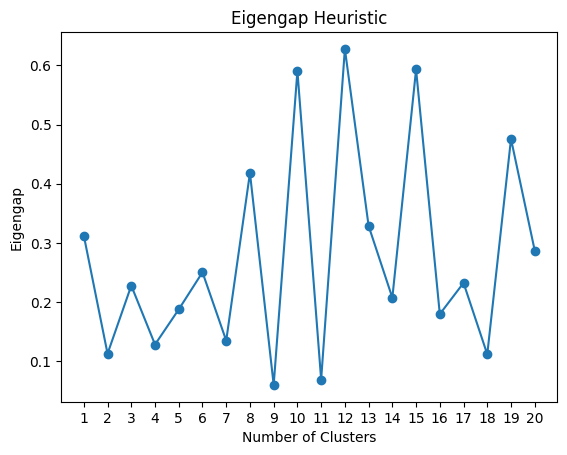

12


In [58]:
from sklearn.neighbors import kneighbors_graph

similarity_matrix = kneighbors_graph(df_red, n_neighbors=10, mode='connectivity', include_self=True)
similarity_matrix = similarity_matrix.toarray()
degree_matrix = np.diag(np.sum(similarity_matrix, axis=1))
laplacian_matrix = degree_matrix - similarity_matrix
eigenvalues, eigenvectors = np.linalg.eigh(laplacian_matrix)
sorted_indices = np.argsort(eigenvalues)
sorted_eigenvalues = eigenvalues[sorted_indices]
eigengaps = np.diff(sorted_eigenvalues)
eigengaps = eigengaps[:20]
optimal_k_index = np.argmax(eigengaps)

# Plot eigengaps
plt.plot(range(1, len(eigengaps) + 1), eigengaps, marker='o')
plt.title('Eigengap Heuristic')
plt.xlabel('Number of Clusters')
plt.ylabel('Eigengap')
plt.xticks(np.arange(1, len(eigengaps) + 1, step=1))  # Adjust step value as needed
plt.show()

optimal_k = optimal_k_index + 1
print(optimal_k)

# Spectral Clustering on Reduced Dataset(Using PCA)

### a) Using nearest_neighbours

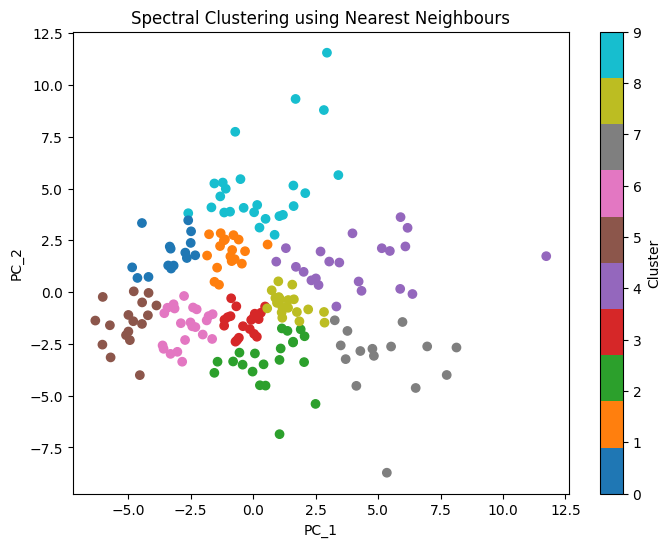

In [69]:
from sklearn.cluster import SpectralClustering
spectral_clustering = SpectralClustering(n_clusters=10, affinity='nearest_neighbors')

# Fit and predict cluster labels
nn_labels = spectral_clustering.fit_predict(df_red)

plt.figure(figsize=(8, 6))
plt.scatter(df_red['PC_1'], df_red['PC_2'], c=nn_labels, cmap='tab10')
plt.title('Spectral Clustering using Nearest Neighbours')
plt.xlabel('PC_1')
plt.ylabel('PC_2')
plt.colorbar(label='Cluster')
plt.show()


### b) Using rbf

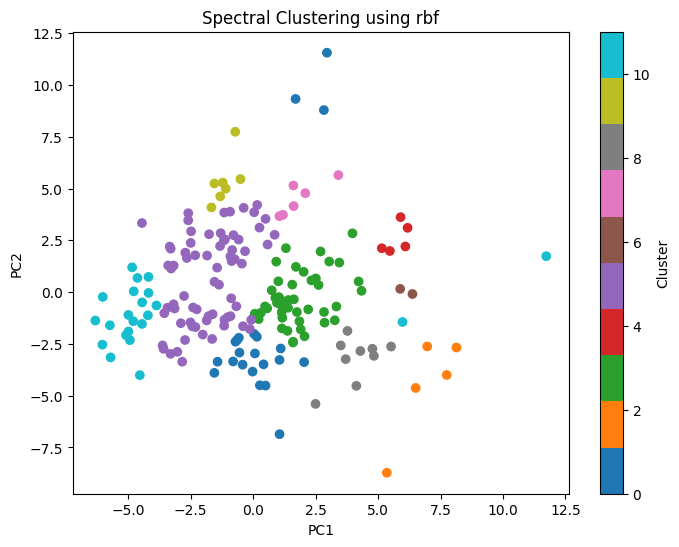

In [70]:
from sklearn.cluster import SpectralClustering
spectral_clustering = SpectralClustering(n_clusters=optimal_k, affinity='rbf')

# Fit and predict cluster labels
rbf_labels = spectral_clustering.fit_predict(df_red)

plt.figure(figsize=(8, 6))
plt.scatter(df_red['PC_1'], df_red['PC_2'], c=rbf_labels, cmap='tab10')
plt.title('Spectral Clustering using rbf')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(label='Cluster')
plt.show()


### Comparing results using Silhouette Score

Silhouette Score for 'nearest_neighbors' affinity: 0.2859591356524479
Silhouette Score for 'rbf' affinity: 0.22448734782117472


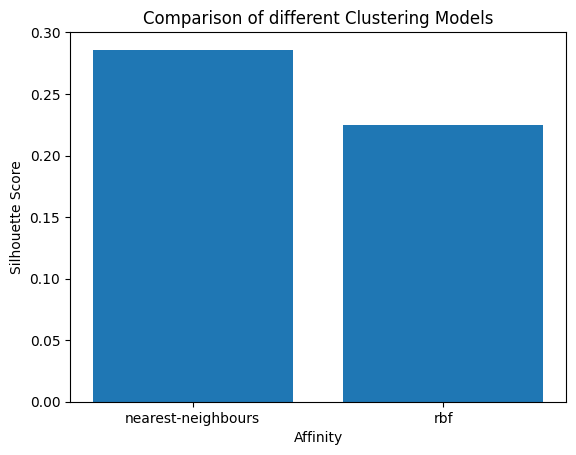

In [73]:
affinity = ['nearest-neighbours', 'rbf']

s_scores = []
s_scores.append(silhouette_score(df_red, nn_labels))
s_scores.append(silhouette_score(df_red, rbf_labels))

print("Silhouette Score for 'nearest_neighbors' affinity:", s_scores[0])
print("Silhouette Score for 'rbf' affinity:", s_scores[1])

# Plotting Bar Graph to compare the Models
plt.bar(affinity, s_scores)
plt.xlabel('Affinity')
plt.ylabel('Silhouette Score')
plt.title('Comparison of different Clustering Models')
plt.show()


# Spectral Clustering on Normalised Dataset

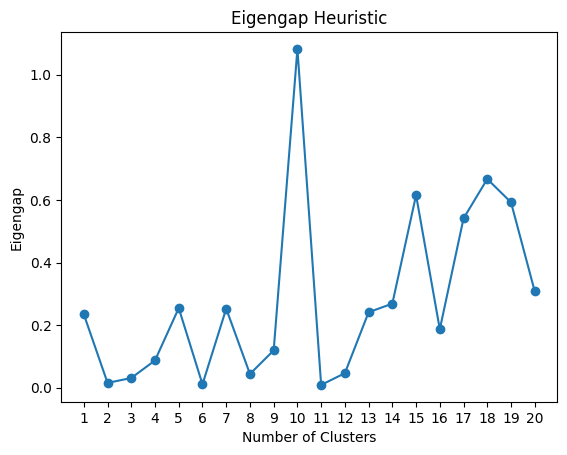

10


In [45]:
from sklearn.neighbors import kneighbors_graph

similarity_matrix = kneighbors_graph(df_normalized, n_neighbors=10, mode='connectivity', include_self=True)

similarity_matrix = similarity_matrix.toarray()
degree_matrix = np.diag(np.sum(similarity_matrix, axis=1))
laplacian_matrix = degree_matrix - similarity_matrix
eigenvalues, eigenvectors = np.linalg.eigh(laplacian_matrix)
sorted_indices = np.argsort(eigenvalues)
sorted_eigenvalues = eigenvalues[sorted_indices]
eigengaps = np.diff(sorted_eigenvalues)
eigengaps = eigengaps[:20]
optimal_k_index = np.argmax(eigengaps)

# Plot eigengaps
plt.plot(range(1, len(eigengaps) + 1), eigengaps, marker='o')
plt.title('Eigengap Heuristic')
plt.xlabel('Number of Clusters')
plt.ylabel('Eigengap')
plt.xticks(np.arange(1, len(eigengaps) + 1, step=1))  # Adjust step value as needed
plt.show()

optimal_k = optimal_k_index + 1
print(optimal_k)

### a) Using Nearest Neighbours

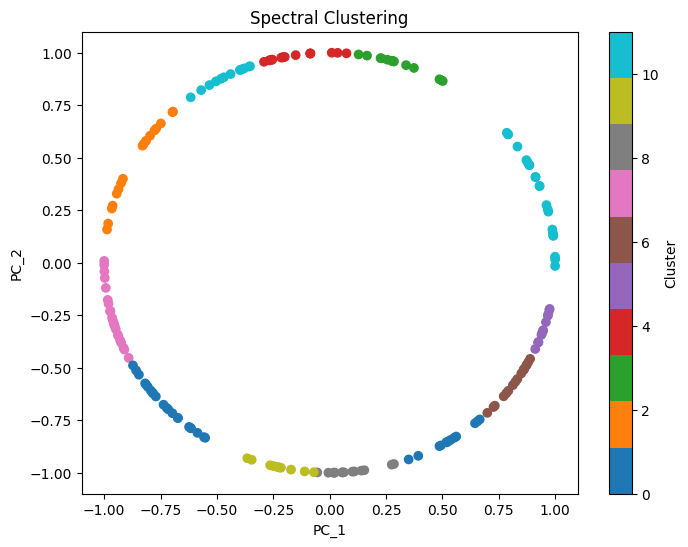

In [74]:
from sklearn.cluster import SpectralClustering
spectral_clustering = SpectralClustering(n_clusters=optimal_k, affinity='nearest_neighbors')
nn_labels = spectral_clustering.fit_predict(df_normalized)

plt.figure(figsize=(8, 6))
plt.scatter(df_normalized['PC_1'], df_normalized['PC_2'], c=nn_labels, cmap='tab10')
plt.title('Spectral Clustering')
plt.xlabel('PC_1')
plt.ylabel('PC_2')
plt.colorbar(label='Cluster')
plt.show()


### b) Using rbf

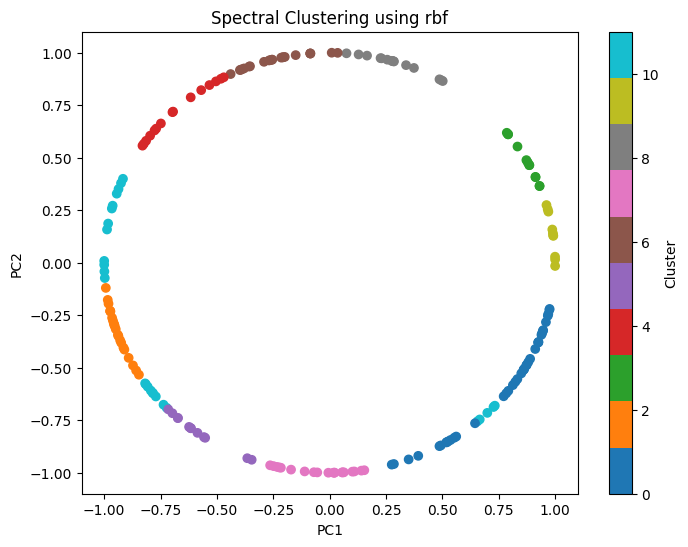

In [77]:
from sklearn.cluster import SpectralClustering
spectral_clustering = SpectralClustering(n_clusters=optimal_k, affinity='rbf')
rbf_labels = spectral_clustering.fit_predict(df_normalized)

plt.figure(figsize=(8, 6))
plt.scatter(df_normalized['PC_1'], df_normalized['PC_2'], c=rbf_labels, cmap='tab10')
plt.title('Spectral Clustering using rbf')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(label='Cluster')
plt.show()


### Comparing the models using Silhouette Score

Silhouette Score for 'nearest_neighbors' affinity: 0.11795100224958567
Silhouette Score for 'rbf' affinity: 0.10621976828937733


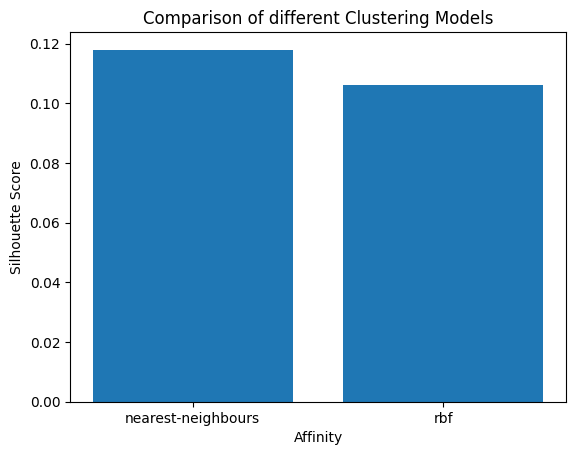

In [78]:
affinity = ['nearest-neighbours', 'rbf']
s_scores = []
s_scores.append(silhouette_score(df_red, nn_labels))
s_scores.append(silhouette_score(df_red, rbf_labels))
print("Silhouette Score for 'nearest_neighbors' affinity:", s_scores[0])
print("Silhouette Score for 'rbf' affinity:", s_scores[1])

# Plotting Bar Graph to compare the Models
plt.bar(affinity, s_scores)
plt.xlabel('Affinity')
plt.ylabel('Silhouette Score')
plt.title('Comparison of different Clustering Models')
plt.show()
